In [16]:
%%capture
%conda install scikit-learn
%conda install seaborn
%conda install pandas 
%conda install numpy
%conda install matplotlib
%conda install imbalanced-learn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.11.0
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.1.0



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.11.0
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.1.0



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.11.0
  latest version: 23.1.0

Please update c

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Part 1: Data Preprocessing

(7496, 21)
(7196, 21)
aluminium      False
ammonia        False
arsenic        False
barium         False
cadmium        False
chloramine     False
chromium       False
copper         False
flouride       False
bacteria       False
viruses        False
lead           False
nitrates       False
nitrites       False
mercury        False
perchlorate    False
radium         False
selenium       False
silver         False
uranium        False
is_safe        False
dtype: bool


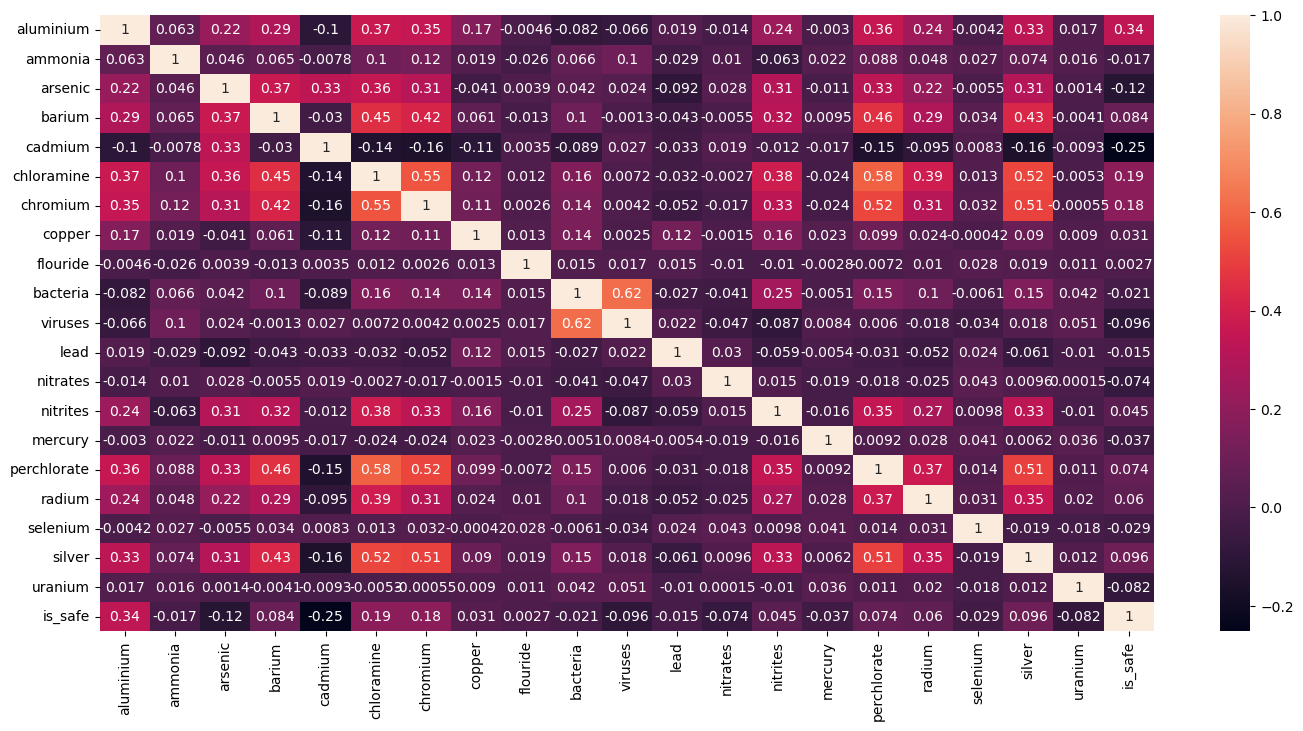

In [2]:
df_train = pd.read_csv('data/train.csv')
print(df_train.shape)

# Remove Duplicates 
df_train.drop_duplicates(inplace=True)
print(df_train.shape)

# Fill in the missing values with the mean value of the dataset
print(df_train.isnull().any())

# Visualize the correlation between every two of the features with a heat map. 
f = plt.figure()
f.set_figwidth(17)
f.set_figheight(8)

plt.show(sns.heatmap(df_train.corr(),annot=True))


In [3]:
minerals = df_train.corr()['chloramine'].sort_values(ascending=False).index.to_list()[1:7]
print(minerals)

['perchlorate', 'chromium', 'silver', 'barium', 'radium', 'nitrites']


## Part 2: Regression

### 5.1 Linear Regression

In [4]:
import copy
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [5]:
train, validation = train_test_split(df_train, test_size = 0.2, random_state = 4211)
print(train.shape)
print(validation.shape)

(5756, 21)
(1440, 21)


In [8]:
#Q2. Report the validation R2 score of 7 models (The last model is the linear combination of the 6 features)

models  = {}

for i in range(len(minerals)):  
  train_X, train_Y = train[minerals[i]], train['chloramine']
  val_X, val_Y = validation[minerals[i]], validation['chloramine']
  
  lr = LinearRegression()
  reg = lr.fit(train_X.to_numpy().reshape(-1,1), train_Y)
  
  models[f'lr{i}'] = copy.deepcopy(lr)
  
  print(f"Mineral: " + minerals[i] )
#   print("Coefficient:" + str(reg.coef_))
#   print("Intercept: " + str(reg.intercept_))
  print("R2 Score: " + str(reg.score(val_X.to_numpy().reshape(-1,1), val_Y)))
  print()
  
train_X, train_Y = train[minerals], train['chloramine']
val_X, val_Y = validation[minerals], validation['chloramine']

lr = LinearRegression()
reg = lr.fit(train_X, train_Y)

models[f'lr{6}'] = copy.deepcopy(lr)
print(f"Mineral: {minerals}")
# print("Coefficients:" + str(reg.coef_))
# print("Intercept: " + str(reg.intercept_))
print("R2 Score: " + str(reg.score(val_X, val_Y)))
  

Mineral: perchlorate
R2 Score: 0.34727163558690055

Mineral: chromium
R2 Score: 0.31138489178953244

Mineral: silver
R2 Score: 0.29193122809804106

Mineral: barium
R2 Score: 0.2017232988334794

Mineral: radium
R2 Score: 0.18902582154390024

Mineral: nitrites
R2 Score: 0.1675063127334001

Mineral: ['perchlorate', 'chromium', 'silver', 'barium', 'radium', 'nitrites']
R2 Score: 0.5005101127629697


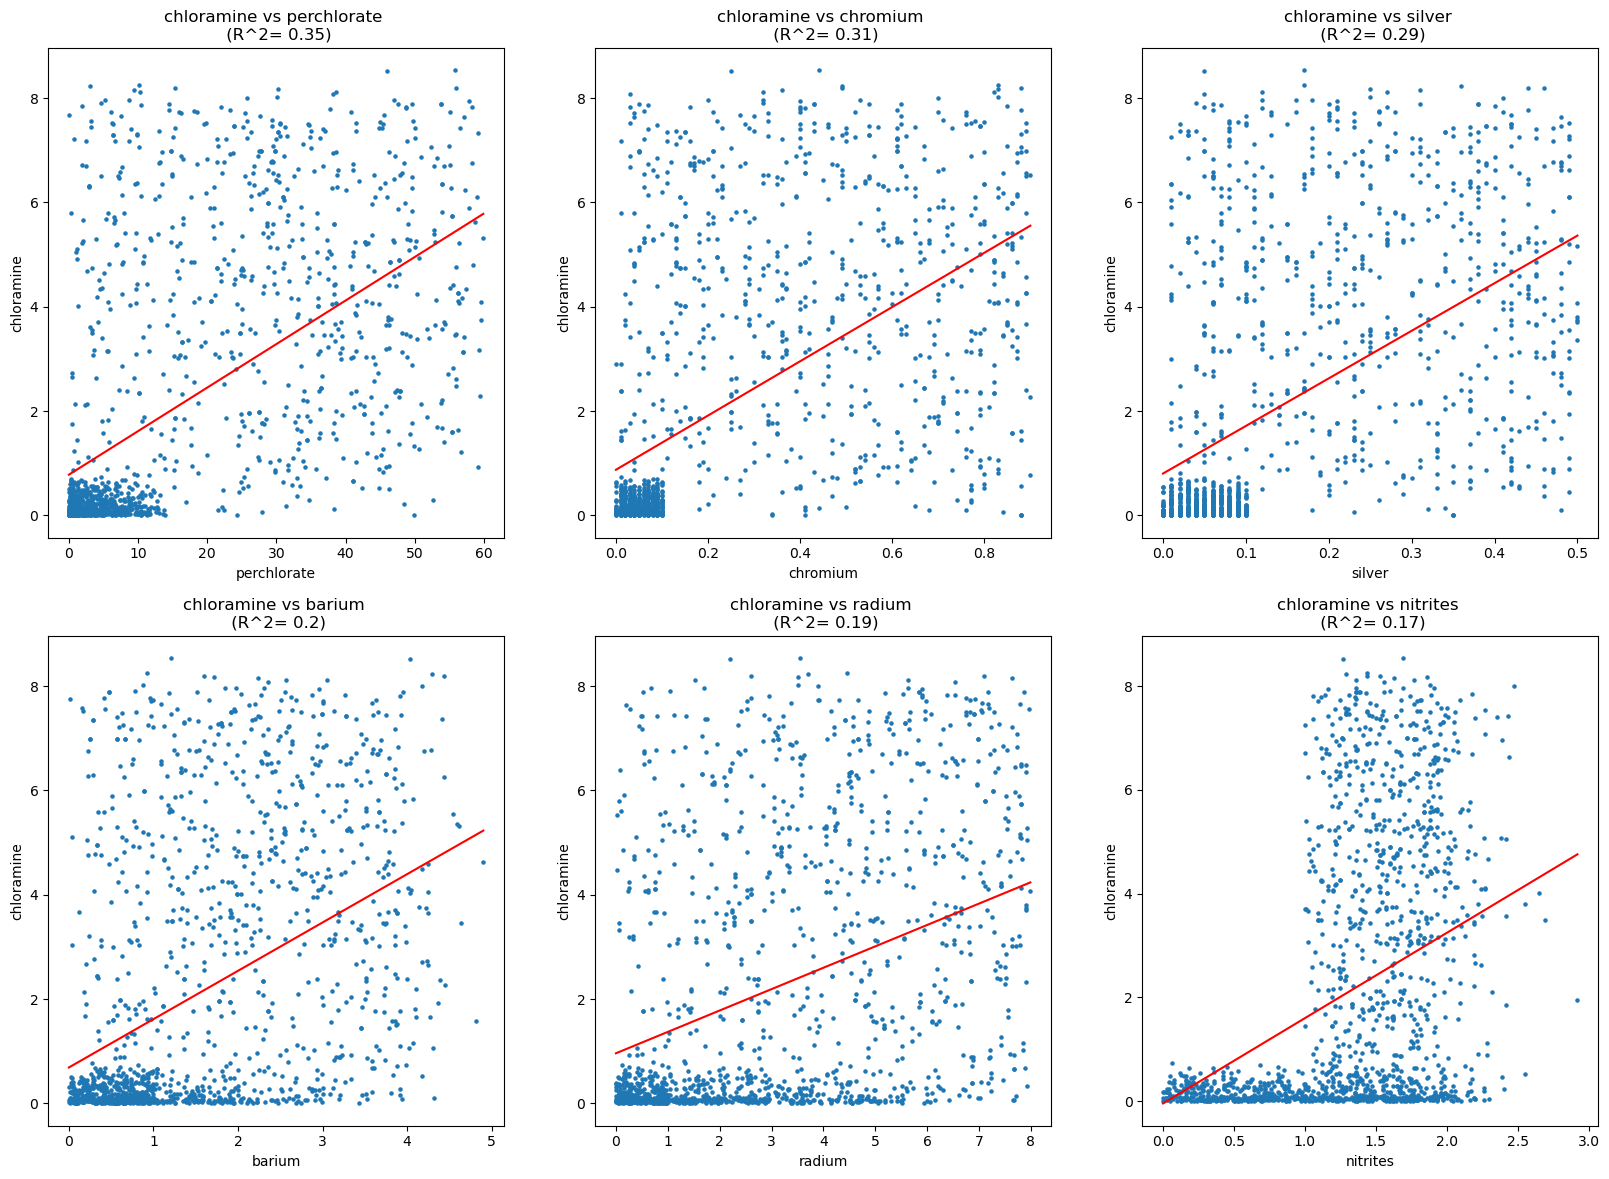

In [9]:
#Q3. Plot the regression line and the daa
fig, axs = plt.subplots(2,3)
fig.set_size_inches([20,14])

for i, ax in enumerate(axs.flat):
  
  reg = models[f'lr{i}']
  
  val_X = validation[minerals[i]]
  val_Y = validation['chloramine']

  ax.scatter(val_X, val_Y, s=5)
  
  xfit = np.linspace(0,val_X.max(),1000)
  yfit = reg.coef_ * xfit + reg.intercept_
  
  r2score = reg.score(val_X.to_numpy().reshape(-1,1), val_Y)
  
  ax.set_title(f'chloramine vs {minerals[i]} \n (R^2= {round(r2score,2)})')
  ax.set(xlabel= minerals[i] ,ylabel="chloramine" )
  ax.plot(xfit, yfit, 'r')

In [11]:
#Q4. Report the mean squared error of the models
from sklearn.metrics import mean_squared_error

for i in range(len(minerals)):
  reg = models[f'lr{i}']
  val_X, val_Y = validation[minerals[i]], validation['chloramine']
  N = val_Y.shape[0]
  
  predict_Y = reg.predict(val_X.to_numpy().reshape(-1,1))
  MSE = mean_squared_error(val_Y, predict_Y)
    
  print(f'Mineral: {minerals[i]}')
  print(f'Mean Square Error: {MSE}')
  
  print()

reg = models['lr6']
val_X, val_Y = validation[minerals], validation['chloramine']

predict_Y = reg.predict(val_X)
MSE = mean_squared_error(val_Y, predict_Y)

print(f'Mineral: {minerals}')
print(f'Mean Square Error: {MSE}')

Mineral: perchlorate
Mean Square Error: 4.5180732447819425

Mineral: chromium
Mean Square Error: 4.766475100489592

Mineral: silver
Mean Square Error: 4.901130007843806

Mineral: barium
Mean Square Error: 5.525533747435942

Mineral: radium
Mean Square Error: 5.6134234969029455

Mineral: nitrites
Mean Square Error: 5.762377828135342

Mineral: ['perchlorate', 'chromium', 'silver', 'barium', 'radium', 'nitrites']
Mean Square Error: 3.457382915470382


[-10.26909564]
2.5911079680926083
R2 score: 0.012403388531904369


Text(0, 0.5, 'chloramine')

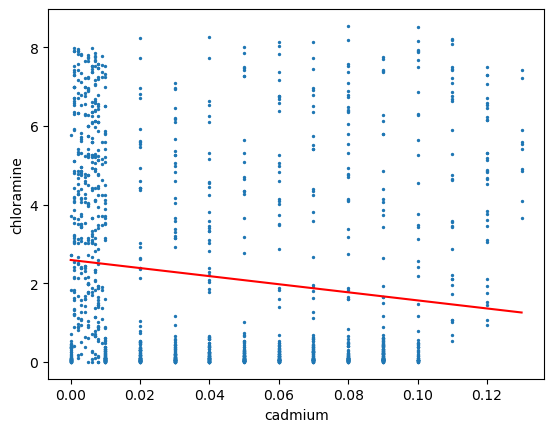

In [14]:
#Q5. Regression model with the least correlated mineral against chloramine.
least_corr_mineral = df_train.corr()['chloramine'].sort_values(ascending=False).index.to_list()[-1]

train_X, train_Y = train[least_corr_mineral], train['chloramine']
val_X, val_Y = validation[least_corr_mineral], validation['chloramine']

lr = LinearRegression()
reg = lr.fit(train_X.to_numpy().reshape(-1,1), train_Y)

print(reg.coef_)
print(reg.intercept_)

xfit = np.linspace(0, val_X.to_numpy().max(), 1000)
yfit = reg.coef_ * xfit + reg.intercept_

predict_Y = reg.predict(val_X.to_numpy().reshape(-1,1))


print("R2 score: " + str(reg.score(val_X.to_numpy().reshape(-1,1), val_Y)))

plt.scatter(val_X, val_Y, s=2)
plt.plot(xfit,yfit, 'r')
plt.xlabel(least_corr_mineral)
plt.ylabel('chloramine')


### 5.2 Feedforward Neural Networks

In [15]:
from sklearn.neural_network import MLPRegressor
import time

In [55]:
#Q6
H = [1,4,16,64,128]

training_time = np.zeros((5,3))
r2score = np.zeros((5,3))
random_state = [4211,4212,4213]

for i in range(len(H)):  
  
  for j in range(3):
    
    train_X, train_Y = train[minerals], train['chloramine']
    val_X, val_Y = validation[minerals], validation['chloramine']
    
    mlp = MLPRegressor(hidden_layer_sizes=(H[i],H[i],H[i]), early_stopping=True, max_iter=300, random_state=random_state[j])
   
    start = time.time()
    mlp.fit(train_X, train_Y)
    end = time.time()

    #Training Time
    training_time[i][j] = end - start
    #R2 Score
    r2score[i][j] = mlp.score(val_X, val_Y)
    



Training Time Mean of 3 Trials


,1,4,16,64,128
Time,0.632,1.763,1.505,2.521,4.436



Training Time std of 3 Trials


,1,4,16,64,128
Time,0.302,0.079,0.313,0.365,0.163



R2 Score Mean of 3 Trials


,1,4,16,64,128
Score,-0.004,0.585,0.591,0.6,0.605



R2 Score std of 3 Trials


,1,4,16,64,128
Score,0.002,0.017,0.007,0.002,0.003


Text(0, 0.5, 'R2 Score')

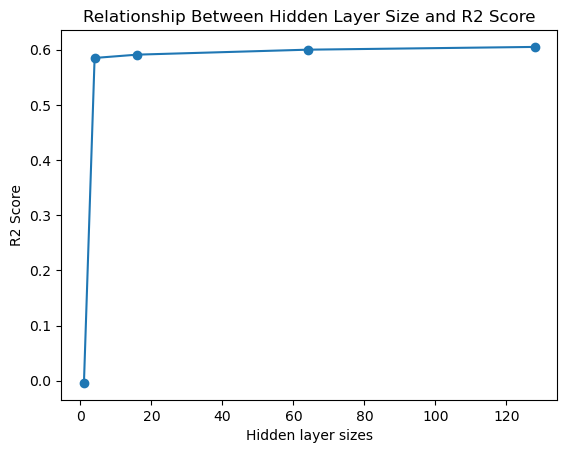

In [56]:
print("Training Time Mean of 3 Trials")
display(pd.DataFrame(training_time.mean(axis=1).round(3).reshape(1,5), columns = H, index=['Time']))

print()

print("Training Time std of 3 Trials")
display(pd.DataFrame(training_time.std(axis=1).round(3).reshape(1,5), columns = H, index=['Time']))

print()

print("R2 Score Mean of 3 Trials")
display(pd.DataFrame(r2score.mean(axis=1).round(3).reshape(1,5), columns = H, index=['Score']))

print()

print("R2 Score std of 3 Trials")
display(pd.DataFrame(r2score.std(axis=1).round(3).reshape(1,5), columns = H, index=['Score']))

plt.scatter(H, r2score.mean(axis=1).round(3))
plt.plot(H, r2score.mean(axis=1).round(3))
plt.title("Relationship Between Hidden Layer Size and R2 Score")
plt.xlabel("Hidden layer sizes")
plt.ylabel("R2 Score")

## Part 3: Classification

### 6.1 Feature Selection


In [57]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

In [58]:
#Q8
train_X, train_Y = train.drop(columns=['is_safe']), train['is_safe']
val_X, val_Y = validation.drop(columns=['is_safe']), validation['is_safe']

selector = SelectKBest(mutual_info_classif, k=15).fit(train_X, train_Y)

mask = selector.get_support()

features = train_X.columns[mask]
scores = pd.DataFrame(selector.scores_.reshape(1, -1), columns=train_X.columns)

train_X = selector.transform(train_X)
val_X = val_X[features]

scores.T



,0
aluminium,0.073937
ammonia,0.000000
arsenic,0.035871
barium,0.000000
cadmium,0.075201
chloramine,0.019835
chromium,0.020092
copper,0.003021
flouride,0.001936
bacteria,0.008275


### 6.2 Logistic Regression

In [60]:
from sklearn.linear_model import SGDClassifier
from sklearn import metrics

In [72]:
#Q9

training_time = np.zeros(3)
acc_score = np.zeros(3)
f1_score = np.zeros(3)
random_state = [4211,4212,4213]

for i in range(3):
  
  logreg = SGDClassifier(loss="log_loss", learning_rate='optimal', random_state=random_state[i])
  
  start = time.time()
  logreg.fit(train_X, train_Y)
  end = time.time()

  
  #Training Time
  training_time[i] = end - start
  
  validation_predict = logreg.predict(val_X)
  #Accuracy Score
  acc_score[i] = metrics.accuracy_score(val_Y,validation_predict)
  
  #F1 Score
  f1_score[i] = metrics.f1_score(val_Y,validation_predict)

print("Training Time Mean: " + str(round(training_time.mean(),3)))
print("Training Time std: " + str(round(training_time.std(),3)))
  
print("Accuracy Score Mean: " + str(round(acc_score.mean(),3)))
print("Accuracy Score std: " + str(round(acc_score.std(),3)))
  
print("f1 Score Mean: " + str(round(f1_score.mean(),3)))
print("f1 Score std: " + str(round(f1_score.std(),3)))



Training Time Mean: 0.066
Training Time std: 0.019
Accuracy Score Mean: 0.859
Accuracy Score std: 0.049
f1 Score Mean: 0.285
f1 Score std: 0.138


/Users/hangyulson/opt/anaconda3/envs/comp4221/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(
/Users/hangyulson/opt/anaconda3/envs/comp4221/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(
/Users/hangyulson/opt/anaconda3/envs/comp4221/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(


/Users/hangyulson/opt/anaconda3/envs/comp4221/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(


<AxesSubplot: >

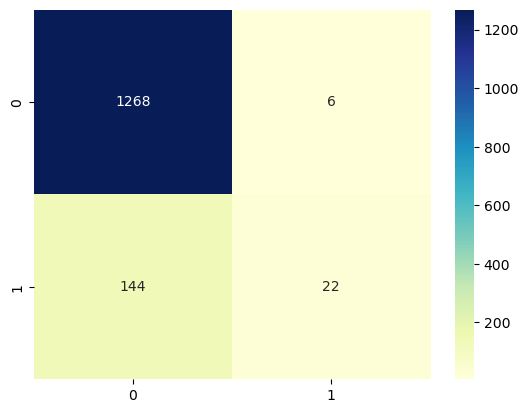

In [73]:
#Q10 Calculate the confusion matrix

logreg = SGDClassifier(loss="log_loss", learning_rate='optimal', random_state=4211)

start = time.time()
logreg.fit(train_X, train_Y)
end = time.time()

validation_predict = logreg.predict(val_X)

cfs_mtx = metrics.confusion_matrix(val_Y, validation_predict)
sns.heatmap(cfs_mtx, annot=True, cmap="YlGnBu" ,fmt='g')

In [75]:
#Q11 Various Learning Rates
from sklearn.linear_model import LogisticRegression

In [76]:
learning_rate_types = ['sag', 'lbfgs']

acc_score = np.zeros(len(learning_rate_types))
f1_score = np.zeros(len(learning_rate_types)) 

for i in range(len(learning_rate_types)):
  logreg = LogisticRegression(solver=learning_rate_types[i], random_state=4211)
  
  logreg.fit(train_X, train_Y)
 
  validation_predict = logreg.predict(val_X)
 
  #Accuracy Score
  acc_score[i] = metrics.accuracy_score(val_Y,validation_predict)
  
  #F1 Score
  f1_score[i] = metrics.f1_score(val_Y,validation_predict)
  
logreg = SGDClassifier(loss="log_loss", learning_rate='optimal', random_state=4211)
logreg.fit(train_X, train_Y)

val_predict = logreg.predict(val_X)



learning_rate_types.append('sgd')
acc_score = np.append(acc_score, metrics.accuracy_score(val_Y,val_predict))
f1_score = np.append(f1_score, metrics.f1_score(val_Y,val_predict))

pd.DataFrame(np.array([acc_score, f1_score]),columns=[learning_rate_types], index=['Accuracy', 'F1_score'])


/Users/hangyulson/opt/anaconda3/envs/comp4221/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hangyulson/opt/anaconda3/envs/comp4221/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/hangyulson/opt/anaconda3/envs/comp4221/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/hangyulson/opt/anaconda3/envs/comp

,sag,lbfgs,sgd
Accuracy,0.890972,0.897222,0.895833
F1_score,0.364372,0.408000,0.226804


### 6.3 Feedforward Neural Networks

In [89]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [86]:
#Q12
H = [1,4,16,64,128]

training_time = np.zeros((5,3))
acc_score = np.zeros((5,3)) 
f1_score = np.zeros((5,3))

scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_X)
val_scaled = scaler.fit_transform(val_X)

for i in range(len(H)):
  for j in range(3):
    mlp = MLPClassifier(hidden_layer_sizes=(H[i],H[i],H[i]), early_stopping=True, random_state=random_state[j])
    start = time.time()
    mlp.fit(train_scaled, train_Y)
    end = time.time()
    
    val_predict = mlp.predict(val_scaled)
    
    #Training Time
    training_time[i][j] = end - start
     
    #Accuracy Score
    acc_score[i][j] = metrics.accuracy_score(val_Y,val_predict)
  
    #F1 Score
    f1_score[i][j] = metrics.f1_score(val_Y,val_predict)



Training Time Mean of 3 Trials


,1,4,16,64,128
Time(s),0.13,0.285,0.762,0.908,1.447



Training Time std of 3 Trials


,1,4,16,64,128
Time(s),0.028,0.162,0.03,0.227,0.101



Accuracy Score Mean of 3 Trials


,1,4,16,64,128
Score,0.628,0.887,0.944,0.944,0.948



Accuracy Score std of 3 Trials


,1,4,16,64,128
Score,0.363,0.003,0.007,0.003,0.003



f1_score Mean of 3 Trials


,1,4,16,64,128
Score,0.069,0.095,0.718,0.715,0.74



f1_score std of 3 Trials


,1,4,16,64,128
Score,0.097,0.134,0.035,0.032,0.019


Text(0, 0.5, 'Accuracy(red), f1_score(blue)')

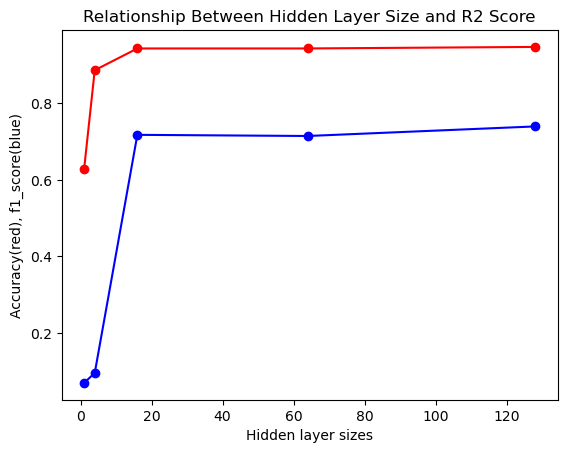

In [87]:
print("Training Time Mean of 3 Trials")
display(pd.DataFrame(training_time.mean(axis=1).round(3).reshape(1,5), columns = H, index=['Time(s)']))

print()

print("Training Time std of 3 Trials")
display(pd.DataFrame(training_time.std(axis=1).round(3).reshape(1,5), columns = H, index=['Time(s)']))

print()

print("Accuracy Score Mean of 3 Trials")
display(pd.DataFrame(acc_score.mean(axis=1).round(3).reshape(1,5), columns = H, index=['Score']))

print()

print("Accuracy Score std of 3 Trials")
display(pd.DataFrame(acc_score.std(axis=1).round(3).reshape(1,5), columns = H, index=['Score']))

print()

print("f1_score Mean of 3 Trials")
display(pd.DataFrame(f1_score.mean(axis=1).round(3).reshape(1,5), columns = H, index=['Score']))

print()

print("f1_score std of 3 Trials")
display(pd.DataFrame(f1_score.std(axis=1).round(3).reshape(1,5), columns = H, index=['Score']))

print()

plt.scatter(H, acc_score.mean(axis=1).round(3), c='r')
plt.plot(H, acc_score.mean(axis=1).round(3), c='r')


plt.scatter(H, f1_score.mean(axis=1).round(3), c='b')
plt.plot(H, f1_score.mean(axis=1).round(3), c='b')
plt.title("Relationship Between Hidden Layer Size and R2 Score")
plt.xlabel("Hidden layer sizes")
plt.ylabel("Accuracy(red), f1_score(blue)")

## Part 4: Performance Enhancement

### 7.1 Hyperparameter Tuning

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
df_test = pd.read_csv('data/test.csv')


#Filter out columns in accordance with the train dataset.
test_X, test_Y = df_test.drop(columns=['is_safe']), df_test['is_safe']           
test_X = test_X[features]              


In [93]:
mlp = MLPClassifier(random_state=4211, hidden_layer_sizes = (16,16,16), early_stopping=True)
#Q16 Report six combination of hyperparameter settings
parameters = {'activation':['identity', 'logistic', 'tanh', 'relu'], 'solver':['lbfgs', 'sgd', 'adam']}

In [94]:
mlp_grid = GridSearchCV(mlp, param_grid=parameters)
mlp_grid.fit(train_X, train_Y)

/Users/hangyulson/opt/anaconda3/envs/comp4221/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/hangyulson/opt/anaconda3/envs/comp4221/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/hangyulson/opt/anaconda3/envs/comp4221/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_pe

/Users/hangyulson/opt/anaconda3/envs/comp4221/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/hangyulson/opt/anaconda3/envs/comp4221/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(estimator=MLPClassifier(early_stopping=True,
                                     hidden_layer_sizes=(16, 16, 16),
                                     random_state=4211),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'solver': ['lbfgs', 'sgd', 'adam']})

In [95]:
#Q17 Report three best hyperparameter setting
results = pd.DataFrame(mlp_grid.cv_results_)
results.sort_values(by = 'rank_test_score', inplace=True)
results[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']].head(3)

,rank_test_score,params,mean_test_score,std_test_score
3,1,"{'activation': 'logistic', 'solver': 'lbfgs'}",0.929640,0.009847
6,2,"{'activation': 'tanh', 'solver': 'lbfgs'}",0.929465,0.002293
9,3,"{'activation': 'relu', 'solver': 'lbfgs'}",0.921478,0.016683


Accuracy Score: 0.928
f1_score: 0.623


/Users/hangyulson/opt/anaconda3/envs/comp4221/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/hangyulson/opt/anaconda3/envs/comp4221/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


<AxesSubplot: >

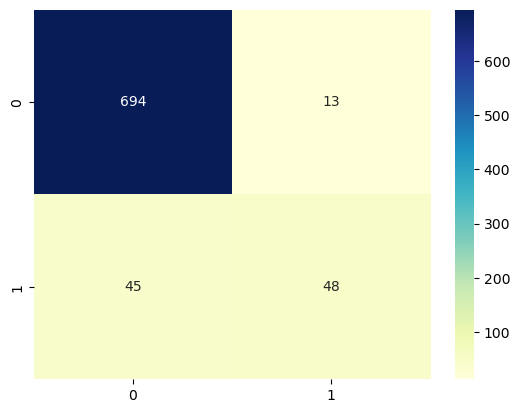

In [96]:
#Q18 Accuracy, F1 score, visualize the confusion matrix
mlp = MLPClassifier(random_state=4211, hidden_layer_sizes = (128,128,128), early_stopping=True, activation='logistic', solver='lbfgs')
mlp.fit(train_X, train_Y)

test_predict = mlp.predict(test_X)

print("Accuracy Score: " + str(round(metrics.accuracy_score(test_Y, test_predict), 3)))
print("f1_score: " + str(round(metrics.f1_score(test_Y, test_predict),3)))
cfs_mtx = metrics.confusion_matrix(test_Y, test_predict)
sns.heatmap(pd.DataFrame(cfs_mtx), annot=True, cmap="YlGnBu" ,fmt='g')

### 7.2 Oversampling

In [97]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import resample


In [99]:
train_X, train_Y = df_train.drop(columns=['is_safe']), df_train['is_safe']
test_X, test_Y = df_test.drop(columns=['is_safe']), df_test['is_safe']

print(len(train_Y[train_Y == 0]))
print(len(train_Y[train_Y == 1]))


6377
819


In [101]:
oversample = RandomOverSampler(sampling_strategy='minority', random_state=4211)

# oversample = resample(train_X[train_Y == 1], train_Y[train_Y== 1], n_samples=train_Y[train_Y == 0].shape[0], random_state=4211)

oversample_train_X, oversample_train_Y = oversample.fit_resample(train_X, train_Y)
# oversample_test_X, oversample_test_Y = oversample.fit_resample(test_X, test_Y)

#Count the instances 
print(len(oversample_train_Y[oversample_train_Y== 0]))
print(len(oversample_train_Y[oversample_train_Y == 1]))

6377
6377


Accuracy Score: 0.794
f1_score: 0.448


/Users/hangyulson/opt/anaconda3/envs/comp4221/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot: >

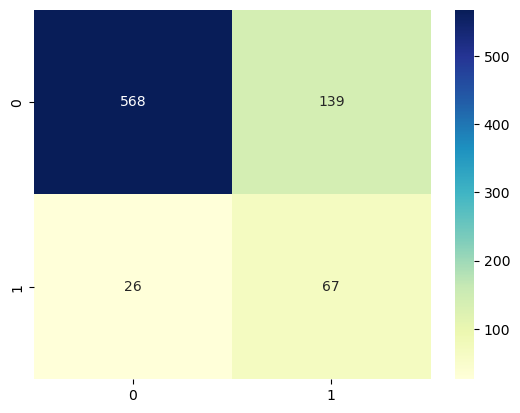

In [102]:
# logreg_oversampling = MLPClassifier(random_state=4211, hidden_layer_sizes = (16,16,16), early_stopping=True, activation='tanh', solver='lbfgs')

logreg_oversampling = LogisticRegression(random_state=4211)
logreg_oversampling.fit(oversample_train_X,oversample_train_Y)

predicted_oversampling = logreg_oversampling.predict(test_X)

print("Accuracy Score: " + str(round(metrics.accuracy_score(test_Y, predicted_oversampling), 3)))
print("f1_score: " + str(round(metrics.f1_score(test_Y, predicted_oversampling),3)))
sns.heatmap(metrics.confusion_matrix(test_Y, predicted_oversampling), annot=True, cmap="YlGnBu" ,fmt='g')


Accuracy Score: 0.792
f1_score: 0.447


/Users/hangyulson/opt/anaconda3/envs/comp4221/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot: >

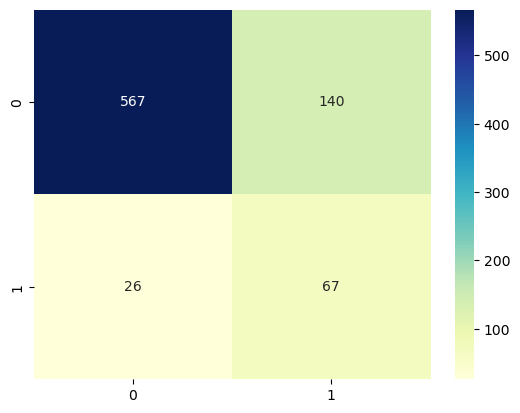

In [103]:
logreg_classweight = LogisticRegression(class_weight='balanced', random_state=4211)
logreg_classweight.fit(train_X, train_Y)
predicted_classweight = logreg_classweight.predict(test_X)

print("Accuracy Score: " + str(round(metrics.accuracy_score(test_Y, predicted_classweight), 3)))
print("f1_score: " + str(round(metrics.f1_score(test_Y, predicted_classweight),3)))
sns.heatmap(metrics.confusion_matrix(test_Y, predicted_classweight), annot=True, cmap="YlGnBu" ,fmt='g')